In [1]:
import anndata
import itertools
import networkx as nx
import pandas as pd
import scanpy as sc
import scglue
import seaborn as sns
from matplotlib import rcParams

In [2]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [3]:
rna = anndata.read_h5ad("/lmh_data/data/sclab/sclab/rna_preprocessed.h5ad")
hic = anndata.read_h5ad("/lmh_data/data/sclab/sclab/hic_preprocessed.h5ad")
graph = nx.read_graphml("/lmh_data/data/sclab/sclab/prior.graphml.gz")

In [4]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

In [5]:
scglue.models.configure_dataset(
    hic, "NB", use_highly_variable=True,
    use_rep="X_pca"
)

In [6]:
graph = graph.subgraph(itertools.chain(
    rna.var.query("highly_variable").index,
    hic.var.query("highly_variable").index
))

In [7]:
glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "hic": hic}, graph,
    fit_kws={
        "directory": "glue",
#         "max_epochs": 60
    }
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
[INFO] autodevice: Using GPU 0 as computation device.
[INFO] SCGLUEModel: Setting `graph_batch_size` = 42565
[INFO] SCGLUEModel: Setting `max_epochs` = 646
[INFO] SCGLUEModel: Setting `patience` = 54
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 27
[INFO] SCGLUETrainer: Using training directory: "glue/pretrain"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.672, 'g_kl': 0.003, 'g_elbo': 0.675, 'x_rna_nll': 0.447, 'x_rna_kl': 0.018, 'x_rna_elbo': 0.465, 'x_hic_nll': 2.104, 'x_hic_kl': 0.001, 'x_hic_elbo': 2.106, 'dsc_loss': 0.561, 'vae_loss': 2.597, 'gen_loss': 2.569}, val={'g_nll': 0.671, 'g_kl': 0.003, 'g_elbo': 0.674, 'x_rna_nll': 0.448, 'x_rna_kl': 0.014, 'x_rna_elbo': 0.462, 'x_hic_nll': 2.081, 'x_hic_kl': 0.001, 'x_hic_elbo': 2.082, 'dsc_loss': 0.537, 'vae_loss': 2.571, 'gen_loss': 2.544}, 5.5s elapsed
[INFO] SCGLUETrainer: [Epoch 20] train={'g_nll': 0.678, 'g_kl': 0.004, 'g_elbo': 0.681, 'x_rna_nll': 0.429, 'x_rna_kl': 0.012

[INFO] SCGLUETrainer: [Epoch 160] train={'g_nll': 0.53, 'g_kl': 0.006, 'g_elbo': 0.536, 'x_rna_nll': 0.411, 'x_rna_kl': 0.01, 'x_rna_elbo': 0.42, 'x_hic_nll': 1.941, 'x_hic_kl': 0.001, 'x_hic_elbo': 1.942, 'dsc_loss': 0.677, 'vae_loss': 2.384, 'gen_loss': 2.35}, val={'g_nll': 0.53, 'g_kl': 0.006, 'g_elbo': 0.536, 'x_rna_nll': 0.438, 'x_rna_kl': 0.009, 'x_rna_elbo': 0.448, 'x_hic_nll': 1.972, 'x_hic_kl': 0.001, 'x_hic_elbo': 1.973, 'dsc_loss': 0.674, 'vae_loss': 2.442, 'gen_loss': 2.409}, 5.4s elapsed
Epoch 00161: reducing learning rate of group 0 to 2.0000e-06.
Epoch 00161: reducing learning rate of group 0 to 2.0000e-06.
[INFO] LRScheduler: Learning rate reduction: step 3
[INFO] SCGLUETrainer: [Epoch 170] train={'g_nll': 0.529, 'g_kl': 0.006, 'g_elbo': 0.535, 'x_rna_nll': 0.412, 'x_rna_kl': 0.01, 'x_rna_elbo': 0.422, 'x_hic_nll': 1.944, 'x_hic_kl': 0.001, 'x_hic_elbo': 1.945, 'dsc_loss': 0.676, 'vae_loss': 2.389, 'gen_loss': 2.355}, val={'g_nll': 0.529, 'g_kl': 0.006, 'g_elbo': 0.535,

2022-07-27 15:36:42,144 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "201"...
[INFO] fit_SCGLUE: Estimating balancing weight...
[INFO] estimate_balancing_weight: Clustering cells...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (12, 9)...
[INFO] estimate_balancing_weight: Estimating balancing weight...
[INFO] fit_SCGLUE: Fine-tuning SCGLUE model...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 42565
[INFO] SCGLUEModel: Setting `align_burnin` = 108
[INFO] SCGLUEModel: Setting `max_epochs` = 646
[INFO] SCGLUEModel: Setting `patience` = 54
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 27
[INFO] SCGLUETrainer: Using training directory: "glue/fine-tune"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.532, 'g_kl': 0.006, 'g_elbo': 0.538, 'x_rna_nll': 0.418, 'x_rna_kl': 0.01, 'x_rna_elbo': 0.428, 'x_hic_nll': 1.952, 'x_hic_kl': 0.001, 'x_hic_elbo': 1.953, 'dsc_loss': 0.676, 'vae_loss': 2.403, 'gen_loss': 2.369}, val={'g_nll': 0.531, 'g_kl': 0.006, 'g_elbo': 0.537, 'x_rna_nll': 0.428, 'x_rna_kl': 0.009, 'x_rna_elbo': 0.437, 'x_hic_nll': 1.957, 'x_hic_kl': 0.001, 'x_hic_elbo': 1.958, 'dsc_loss': 0

[INFO] SCGLUETrainer: [Epoch 160] train={'g_nll': 0.509, 'g_kl': 0.006, 'g_elbo': 0.514, 'x_rna_nll': 0.41, 'x_rna_kl': 0.01, 'x_rna_elbo': 0.42, 'x_hic_nll': 1.94, 'x_hic_kl': 0.001, 'x_hic_elbo': 1.942, 'dsc_loss': 0.682, 'vae_loss': 2.382, 'gen_loss': 2.348}, val={'g_nll': 0.509, 'g_kl': 0.006, 'g_elbo': 0.515, 'x_rna_nll': 0.438, 'x_rna_kl': 0.009, 'x_rna_elbo': 0.447, 'x_hic_nll': 1.973, 'x_hic_kl': 0.001, 'x_hic_elbo': 1.974, 'dsc_loss': 0.667, 'vae_loss': 2.442, 'gen_loss': 2.409}, 5.2s elapsed
[INFO] SCGLUETrainer: [Epoch 170] train={'g_nll': 0.509, 'g_kl': 0.006, 'g_elbo': 0.515, 'x_rna_nll': 0.412, 'x_rna_kl': 0.01, 'x_rna_elbo': 0.422, 'x_hic_nll': 1.943, 'x_hic_kl': 0.001, 'x_hic_elbo': 1.945, 'dsc_loss': 0.676, 'vae_loss': 2.387, 'gen_loss': 2.353}, val={'g_nll': 0.507, 'g_kl': 0.006, 'g_elbo': 0.513, 'x_rna_nll': 0.447, 'x_rna_kl': 0.009, 'x_rna_elbo': 0.456, 'x_hic_nll': 1.959, 'x_hic_kl': 0.001, 'x_hic_elbo': 1.96, 'dsc_loss': 0.657, 'vae_loss': 2.437, 'gen_loss': 2.404

2022-07-27 15:59:13,594 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "201"...


In [8]:
glue.save("/lmh_data/data/sclab/sclab/glue.dill")

In [9]:
# dx = scglue.models.integration_consistency(
#     glue, {"rna": rna, "hic": hic}, graph,
#     count_layers={"rna": "counts"}
# )
# dx

In [10]:
# _ = sns.lineplot(x="n_meta", y="consistency", data=dx).axhline(y=0.05, c="darkred", ls="--")

In [11]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
hic.obsm["X_glue"] = glue.encode_data("hic", hic)

combined = anndata.concat([rna, hic])

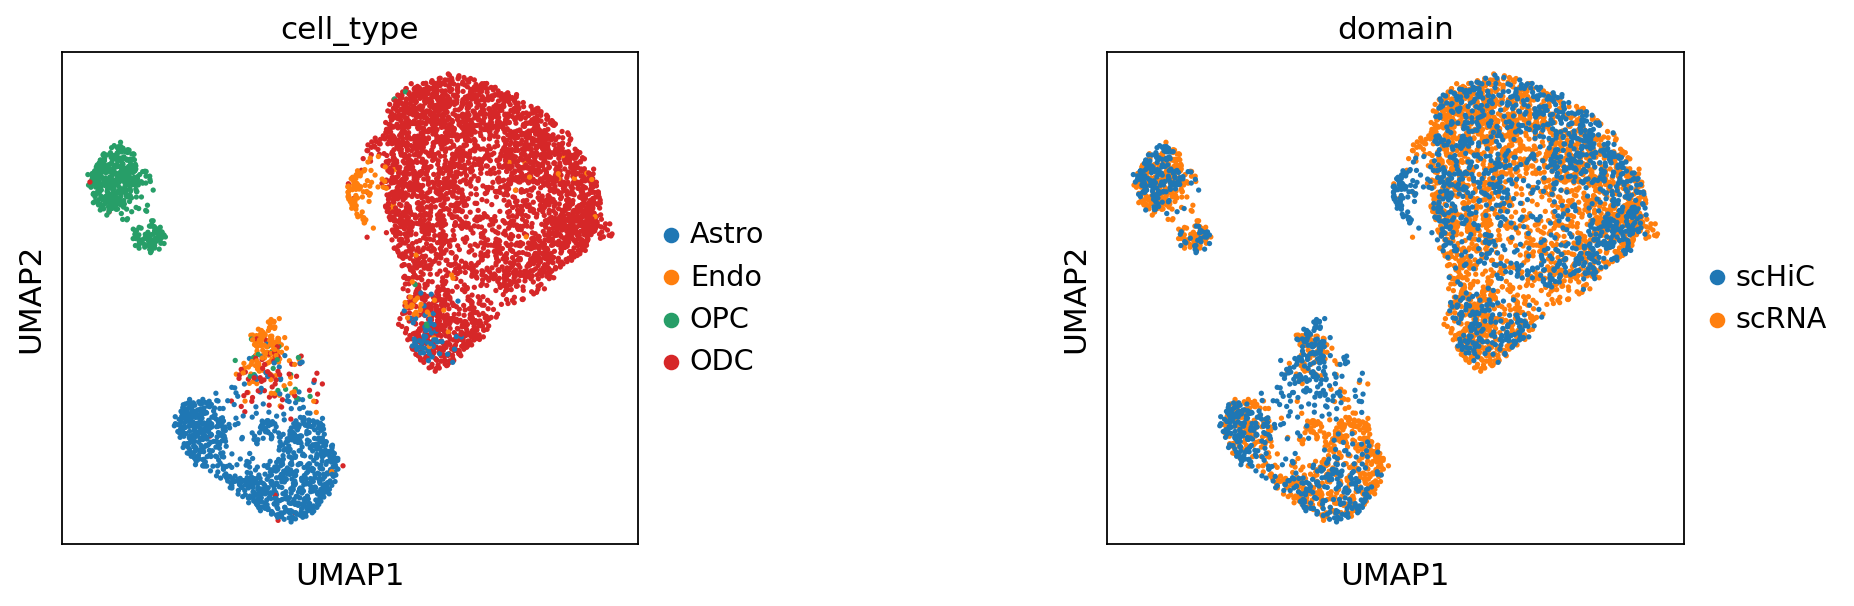

In [12]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65)

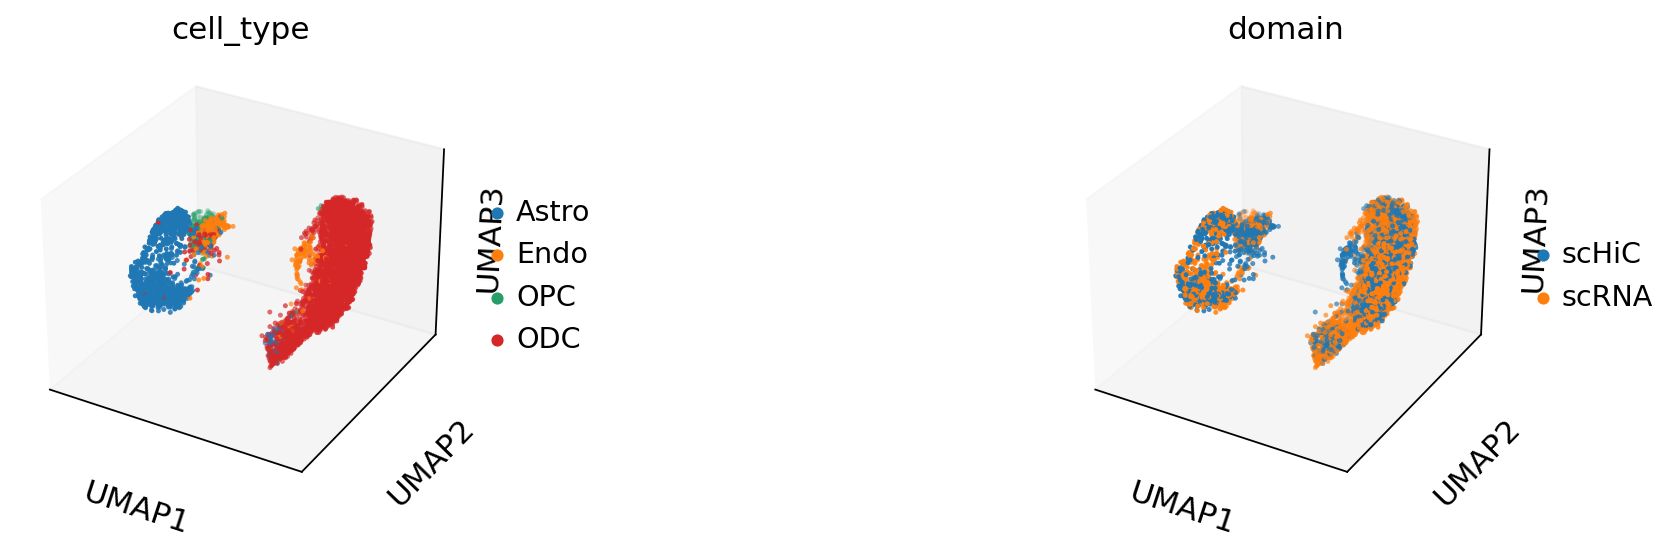

In [13]:
sc.tl.umap(combined, n_components=3)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65, projection='3d')

<IPython.core.display.Javascript object>


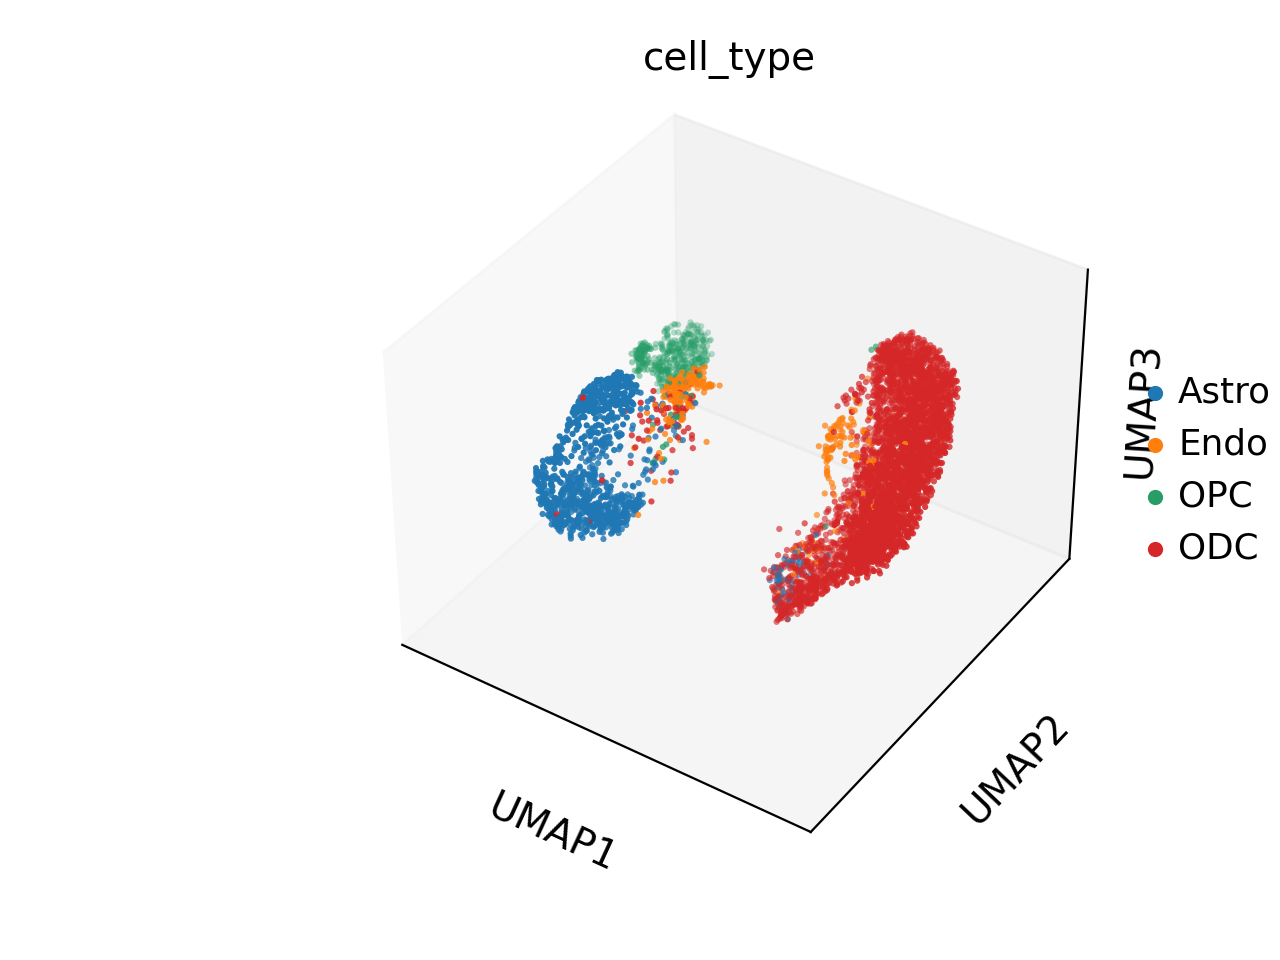

In [14]:
%matplotlib notebook
sc.pl.umap(combined, color=["cell_type"], projection='3d')

In [15]:
rna.write("/lmh_data/data/sclab/sclab/rna_result.h5ad", compression="gzip")
hic.write("/lmh_data/data/sclab/sclab/hic_result.h5ad", compression="gzip")